In [1]:
!pip install ucimlrepo

In [2]:
# Have to restart the kernel after running this
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 24.4 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=5223c5c94412eaab3947054770584b3dc81ed80a98abe7a25ce5eaba5eb75daa
  Stored in directory: /tmp/pip-ephem-wheel-cache-a5grgl36/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wh

In [3]:
# Juliet's imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ydata_profiling import ProfileReport
from ucimlrepo import fetch_ucirepo

In [4]:
# Albert's imports
import tensorflow as tf

In [5]:
# Fetch dataset from UCI repo
bike_sharing_dataset = fetch_ucirepo(id=275)

# Print metadata and variable info
print(bike_sharing_dataset.metadata)
with pd.option_context('display.max_colwidth', None):
  print(bike_sharing_dataset.variables)

# Get full dataset as a dataframe
bike_sharing_df = bike_sharing_dataset.data.original

{'uci_id': 275, 'name': 'Bike Sharing Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Wed Dec 20 2023', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': None, 'additional_info': {'summary': 'Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return

In [6]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
bike_sharing_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [8]:
bike_sharing_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [9]:
# Convert categorical variables to be of type category
bike_sharing_df['hr'] = bike_sharing_df['hr'].astype('category')
bike_sharing_df['mnth'] = bike_sharing_df['mnth'].astype('category')
bike_sharing_df['weekday'] = bike_sharing_df['weekday'].astype('category')
bike_sharing_df['season'] = bike_sharing_df['season'].astype('category')
bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].astype('category')

In [10]:
# Drop instant because it is an ID
bike_sharing_df.drop(columns=['instant'], axis=1, inplace=True)

# Drop yr because it only tells us if the year is 2011 or 2012
bike_sharing_df.drop(columns=['yr'], axis=1, inplace=True)

In [11]:
# Create a new datetime column
def getdatetime(row):
    year, month, day = row[0].split('-')
    hour = row[1]
    return datetime(int(year), int(month), int(day), int(hour))

bike_sharing_df['datetime'] = bike_sharing_df[['dteday', 'hr']].apply(getdatetime, axis=1)

In [12]:
# Introduce a new feature that represents the ratio of casual to registered users
bike_sharing_df['casual_vs_registered'] = bike_sharing_df['casual']/bike_sharing_df['registered']

In [13]:
# Check distribution for new variable
print(bike_sharing_df['casual_vs_registered'].describe())

count    1.737900e+04
mean              inf
std               NaN
min      0.000000e+00
25%      6.779661e-02
50%      1.721854e-01
75%      3.400000e-01
max               inf
Name: casual_vs_registered, dtype: float64


In [14]:
# Handle cases where either casual or registered is 0 by replacing with 1s
casual_temp = bike_sharing_df['casual'].replace(0, 1)
registered_temp = bike_sharing_df['registered'].replace(0, 1)

bike_sharing_df['casual_vs_registered'] = casual_temp/registered_temp

count    17379.000000
mean         0.272440
std          0.283652
min          0.002237
25%          0.091500
50%          0.194030
75%          0.358491
max          7.000000
Name: casual_vs_registered, dtype: float64


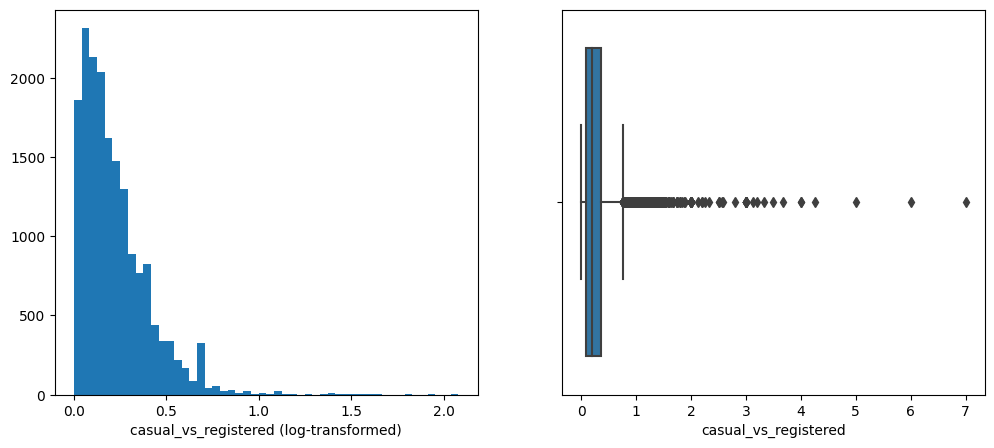

In [15]:
# Reinspect distribution
print(bike_sharing_df['casual_vs_registered'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(np.log1p(bike_sharing_df['casual_vs_registered']), bins=50)
ax1.set_xlabel('casual_vs_registered (log-transformed)')

sns.boxplot(x=bike_sharing_df['casual_vs_registered'], ax=ax2)
plt.show()

In [16]:
# Examine data after changes
bike_sharing_df.head()

dteday season mnth hr  holiday weekday  workingday weathersit  temp  \
0  2011-01-01      1    1  0        0       6           0          1  0.24   
1  2011-01-01      1    1  1        0       6           0          1  0.22   
2  2011-01-01      1    1  2        0       6           0          1  0.22   
3  2011-01-01      1    1  3        0       6           0          1  0.24   
4  2011-01-01      1    1  4        0       6           0          1  0.24   

    atemp   hum  windspeed  casual  registered  cnt            datetime  \
0  0.2879  0.81        0.0       3          13   16 2011-01-01 00:00:00   
1  0.2727  0.80        0.0       8          32   40 2011-01-01 01:00:00   
2  0.2727  0.80        0.0       5          27   32 2011-01-01 02:00:00   
3  0.2879  0.75        0.0       3          10   13 2011-01-01 03:00:00   
4  0.2879  0.75        0.0       0           1    1 2011-01-01 04:00:00   

   casual_vs_registered  
0              0.230769  
1              0.250000  
2              0.185185  
3              0.300000  
4              1.000000

In [17]:
profile = ProfileReport(bike_sharing_df, title="Pandas Profiling Report")

In [18]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile.to_file('./bike-sharing-profile.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Time series prediction